### Importando as bibliotecas utilizadas 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importando dataset e extraindo informações relevantes

In [2]:
df = pd.read_csv(r'dataset/Superstore.csv')
display(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Mudando o formato de algumas colunas para datetime

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%Y-%m-%d')

### Obtendo o total de vendas e de lucro da empresa

In [5]:
Vendas_total = df['Sales'].sum()
Lucro_total = df['Profit'].sum()
print(f'O total de vendas da empresa é de: {Vendas_total :.2f} reais e seu lucro neste período foi de: {Lucro_total :.2f}')

O total de vendas da empresa é de: 2297200.86 reais e seu lucro neste período foi de: 286397.02


### Identificando os produtos que mais geraram valor de venda e que mais geraram lucro

In [24]:
Produtos_campeos = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).reset_index()
Produtos_campeos_lucro = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).reset_index()
display(Produtos_campeos)
display(Produtos_campeos_lucro)

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
...,...,...
1845,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
1846,Grip Seal Envelopes,7.072
1847,Xerox 20,6.480
1848,Avery 5,5.760


,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
...,...,...
1845,Bush Advantage Collection Racetrack Conference...,-1934.3976
1846,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156
1847,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
1848,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730


In [7]:
Produtos = Produtos_campeos['Product Name'].tolist()
Vendas =  Produtos_campeos['Sales'].tolist()
Lucro = Produtos_campeos_lucro['Profit'].tolist()

### Gráficos dos produtos campeões e azarões em vendas e lucro 

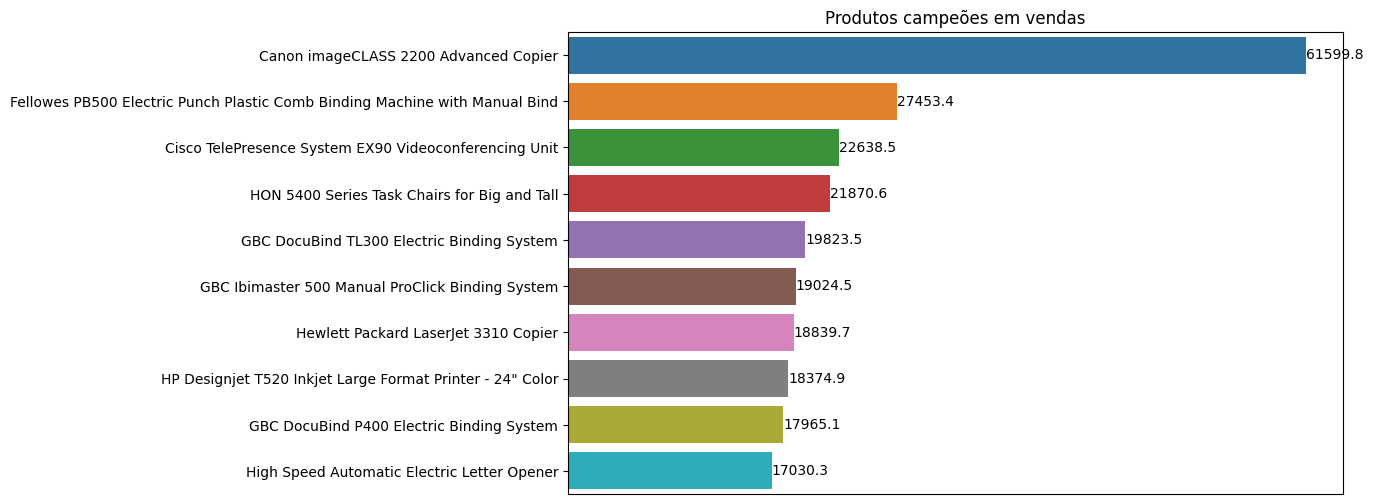

In [8]:
plt.figure(figsize=(10,6))
preju = sns.barplot(x = Vendas[:10], y = Produtos[:10], hue = Produtos[:10])
for container in preju.containers:
    preju.bar_label(container)
plt.xticks([])
plt.title('Produtos campeões em vendas')
plt.show()

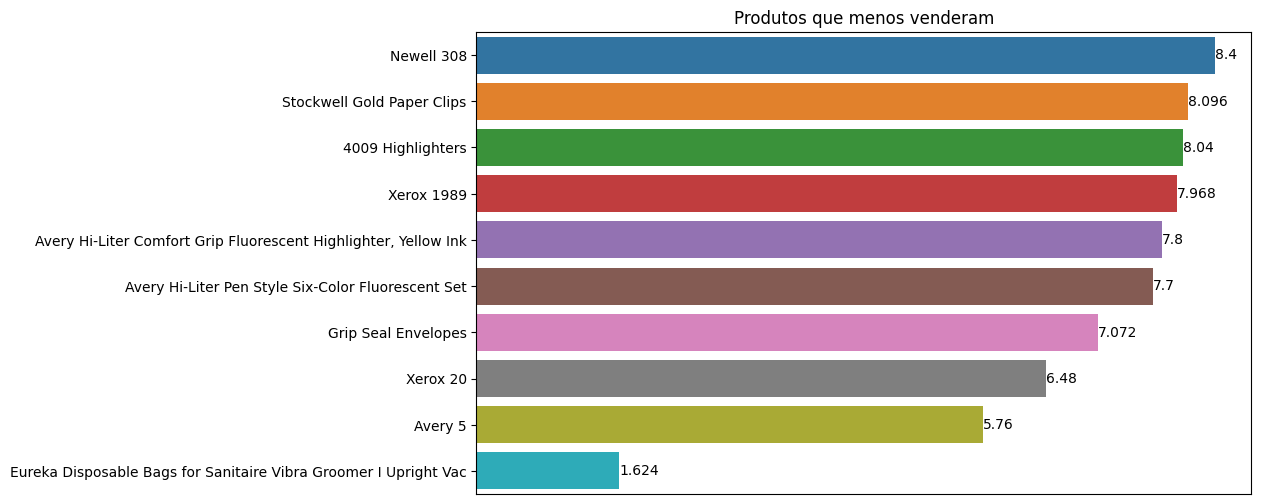

In [9]:
plt.figure(figsize=(10,6))
preju = sns.barplot(x = Vendas[-10:], y = Produtos[-10:], hue = Produtos[-10:])
for container in preju.containers:
    preju.bar_label(container)
plt.xticks([])
plt.title('Produtos que menos venderam')
plt.show()

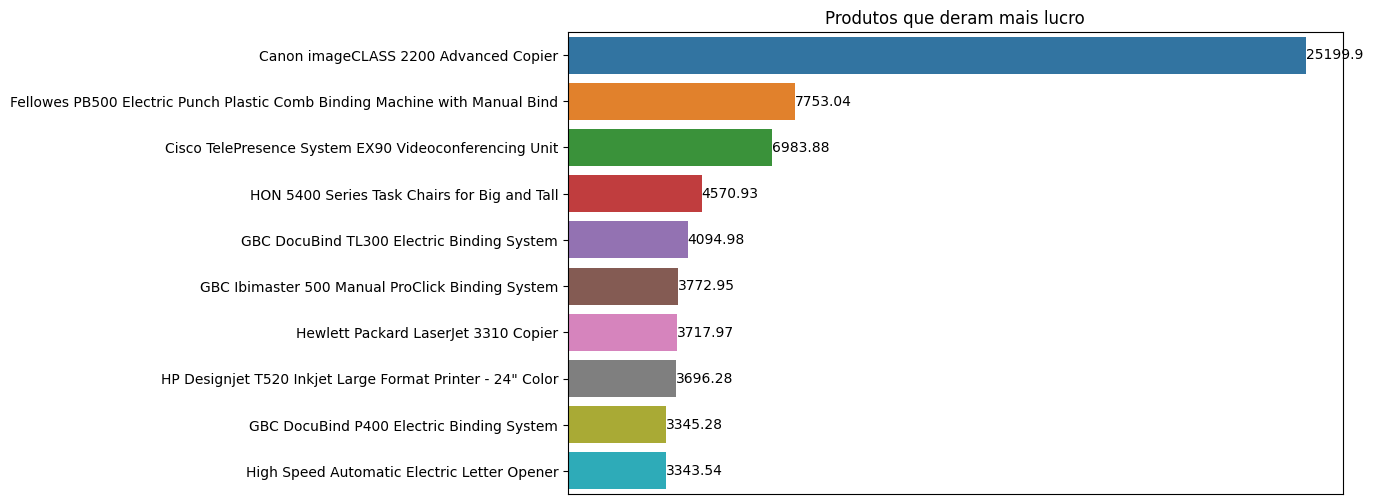

In [10]:
plt.figure(figsize=(10,6))
preju = sns.barplot(x = Lucro[:10], y = Produtos[:10], hue = Produtos[:10])
for container in preju.containers:
    preju.bar_label(container)
plt.xticks([])
plt.title('Produtos que deram mais lucro')
plt.show()

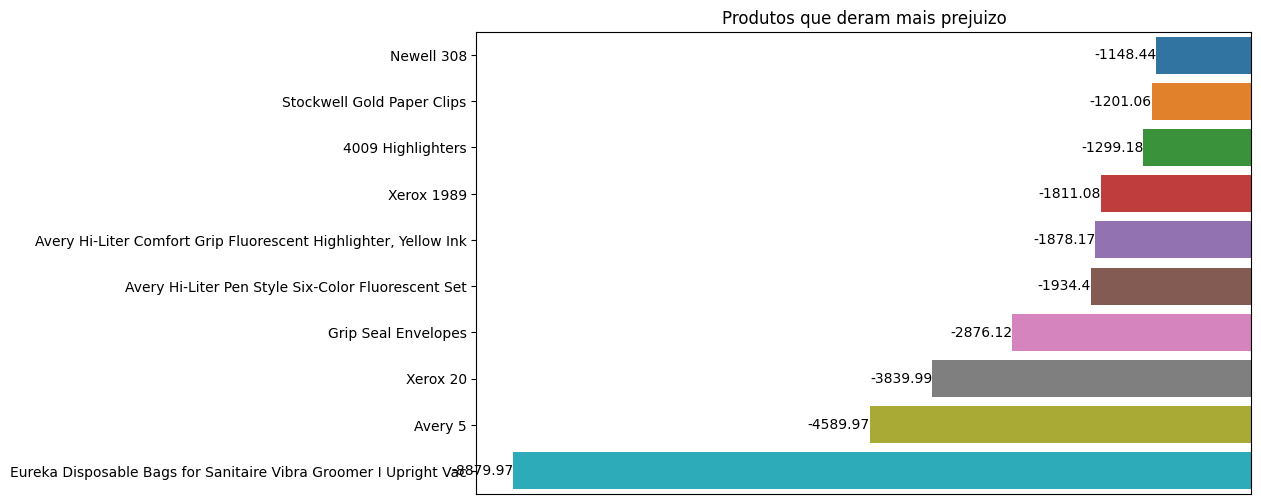

In [11]:
plt.figure(figsize=(10,6))
preju = sns.barplot(x = Lucro[-10:], y = Produtos[-10:], hue = Produtos[-10:])
for container in preju.containers:
    preju.bar_label(container)
plt.xticks([])
plt.title('Produtos que deram mais prejuizo')
plt.show()

### Análise de vendas e lucro por região

In [12]:
vendas_por_regiao = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
lucro_por_regiao = df.groupby('Region')['Profit'].sum().sort_values(ascending=False).reset_index()
display(vendas_por_regiao)
display(lucro_por_regiao)

,Region,Sales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


,Region,Profit
0,West,108418.4489
1,East,91522.7800
2,South,46749.4303
3,Central,39706.3625


### Análise de lucro por categoria de produto

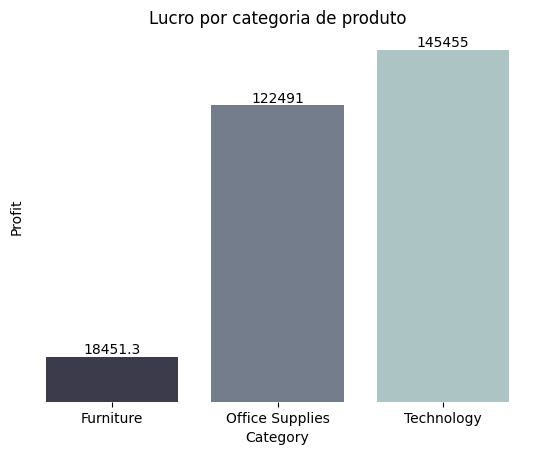

In [13]:
import seaborn as sns

barras = sns.barplot(x = df['Category'], y=df['Profit'], hue=df['Category'], errorbar=None, palette='bone', estimator=sum)
barras.set_title('Lucro por categoria de produto')
for container in barras.containers:
    barras.bar_label(container)
plt.box(False)
plt.yticks([])
plt.show()


### Análise da relação Desconto X Lucro

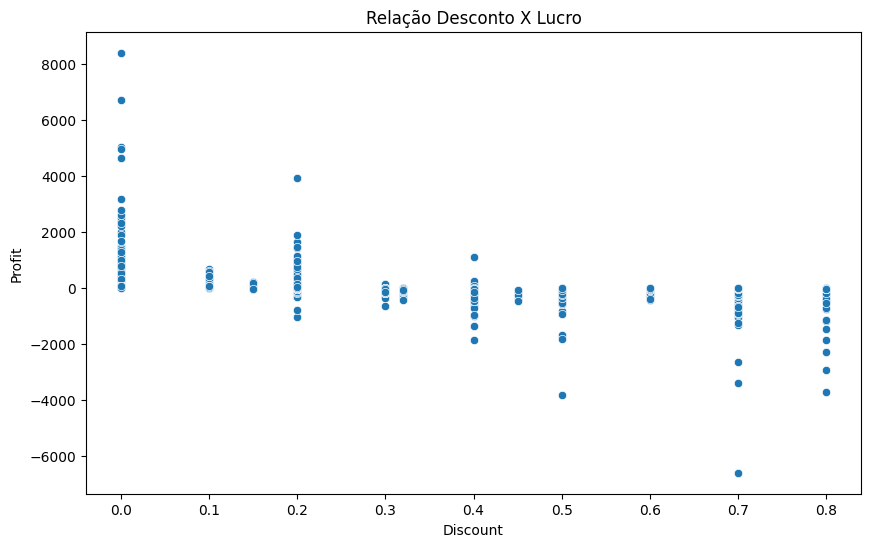

In [23]:
plt.figure(figsize=(10,6))
descontos = sns.scatterplot(x = 'Discount', y = 'Profit', data = df)
plt.title('Relação Desconto X Lucro')
plt.show()

### Análise do segmento de produtos mais valioso

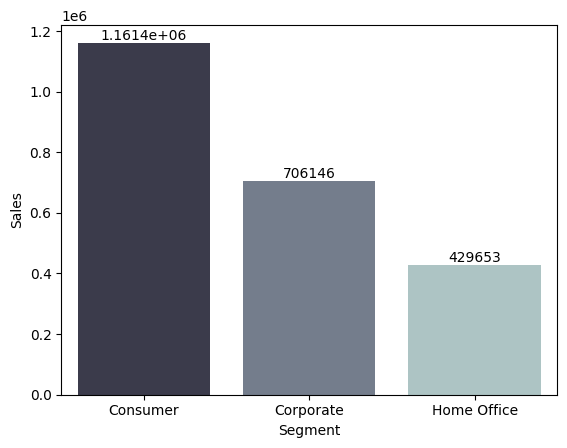

In [15]:
segmento_mais_valioso = sns.barplot(x = 'Segment', y = 'Sales', data = df, hue=df['Segment'], palette = 'bone', errorbar=None, estimator=sum)
for container in segmento_mais_valioso.containers:
    segmento_mais_valioso.bar_label(container)
plt.show()

### Análise dos meses que mais tiveram vendas e mais geraram lucro 

C:\Users\Arthur Lindolpho\AppData\Local\Temp\ipykernel_11644\1763125739.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date').resample('M')['Sales'].sum().plot()


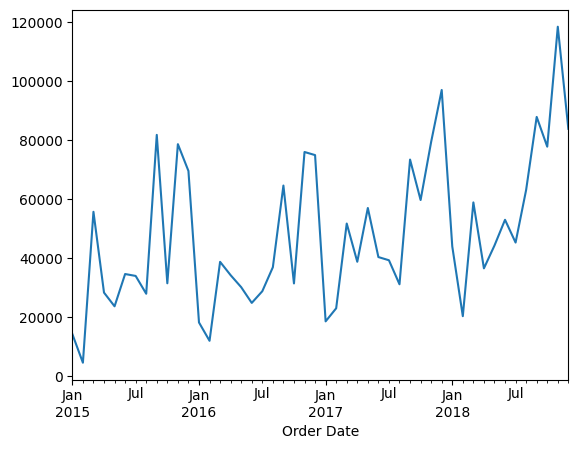

In [16]:
plt.Figure(figsize=(12,5))
df.set_index('Order Date').resample('M')['Sales'].sum().plot()
plt.show()

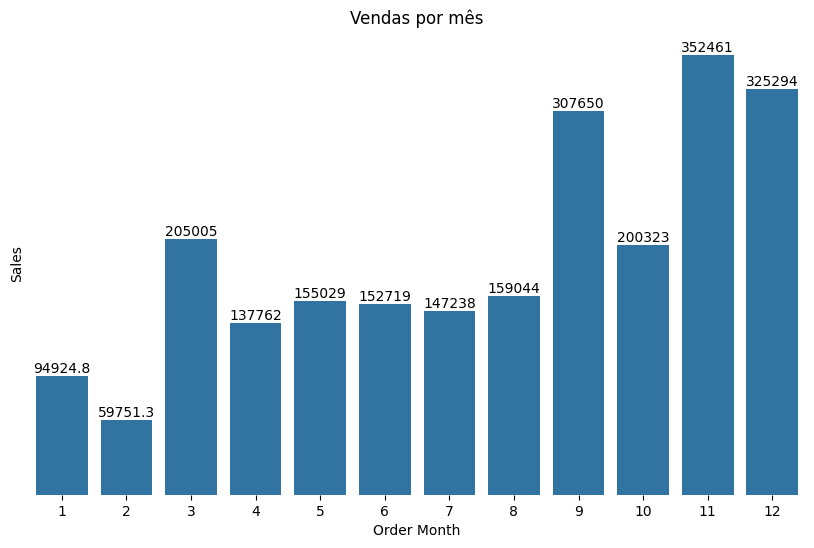

In [17]:
df['Order Month'] = df['Order Date'].dt.month

plt.figure(figsize=(10,6))
venda_meses = sns.barplot(x = 'Order Month', y = 'Sales', data = df, estimator=sum, errorbar=None)
for container in venda_meses.containers:
    venda_meses.bar_label(container)
plt.yticks([])
plt.title('Vendas por mês')
plt.box(False)

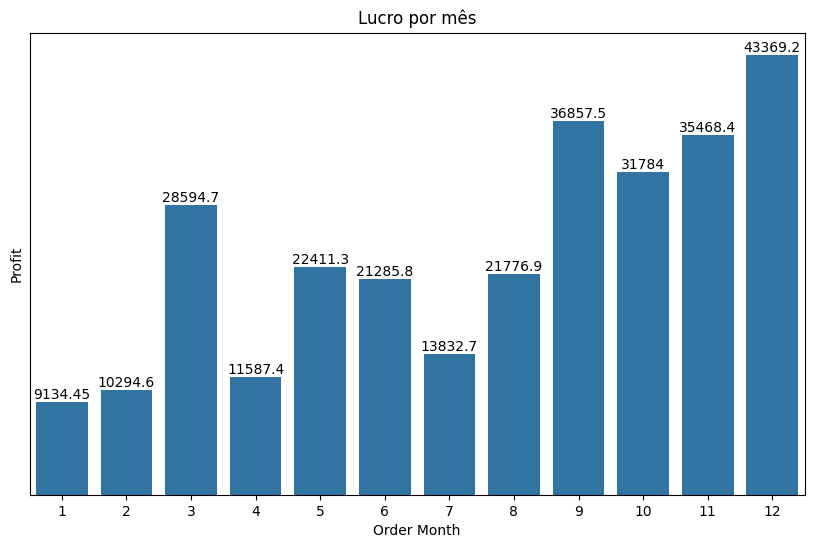

In [22]:
plt.figure(figsize = (10,6))
lucro_mes = sns.barplot(x = 'Order Month', y = 'Profit', errorbar=None, estimator=sum, data = df)
for container in lucro_mes.containers:
    lucro_mes.bar_label(container)
plt.title('Lucro por mês')
plt.yticks([])
plt.show()

### Análise do modo e tempo de envio médio da empresa

In [19]:
df['Shipping Time'] = df['Ship Date'] - df['Order Date']
media_entrega = df['Shipping Time'].mean()
media_entrega = media_entrega.days
print(f'A média do tempo de entrega da empresa é de {media_entrega} dias')

A média do tempo de entrega da empresa é de 3 dias


C:\Users\Arthur Lindolpho\AppData\Local\Temp\ipykernel_11644\4148886741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  modos_de_envio = sns.countplot(x='Ship Mode', data = df, palette='bone')


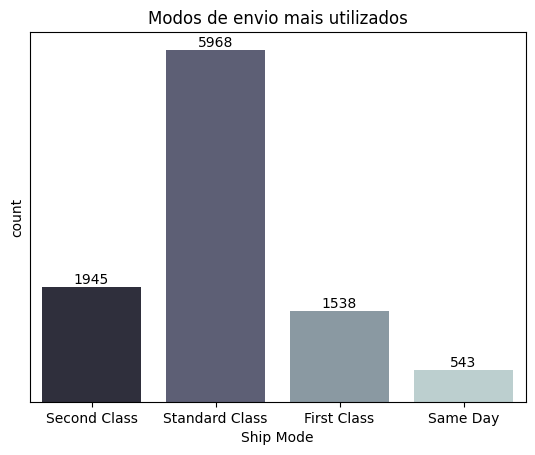

In [20]:
modos_de_envio = sns.countplot(x='Ship Mode', data = df, palette='bone')
for container in modos_de_envio.containers:
    modos_de_envio.bar_label(container)
plt.title('Modos de envio mais utilizados')
plt.yticks([])
plt.show()